## Hacker Statistics

In [305]:
# Hacker statistics: simulated repeated measurments to compute probabilities
import numpy as np
import random
np.random.seed()
np.random.randint(2, size=4)

array([1, 1, 0, 0])

In [306]:
n_all_heads = 0
for trial in range(10000):
    heads = sum(np.random.randint(2, size=4))
    if heads == 4:
        n_all_heads += 1
n_all_heads/10000

0.0608

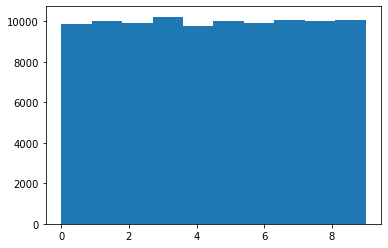

In [307]:
import matplotlib.pyplot as plt
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.randint(10)
plt.hist(random_numbers, bins=10)
plt.show()

## Probability Distributions

In [308]:
# Distrubition functions = mathematical representation of outcomes

# We can compute these distributions to model what we can expect if there is no signal. If the model 
# is a poor fit, we can reject the idea that the results are due to random chance. 

### Binomial Distribution

In [309]:
# Bernoulli trials follow a binomial distribution
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success

In [310]:
perform_bernoulli_trials(100, 0.05)

4

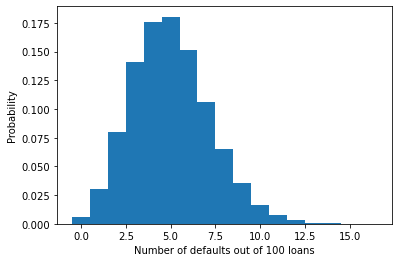

In [311]:
# Bank loans simulation: if probability p of default is 0.05, we might want to know the probability of getting
# certain number of defaults after 100 loans
n_defaults = np.empty(100000)
for i in range(100000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, density=True, bins=bins)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

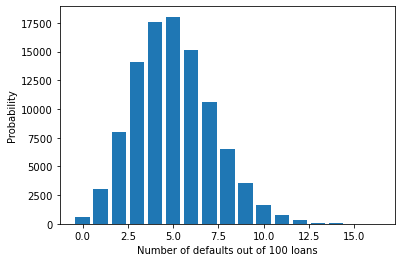

In [312]:
# If we want to use a bar plot, we can use np.unique, which is similar to value_counts() for np.arrays
values, counts = np.unique(n_defaults, return_counts=True)
plt.bar(values, counts)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

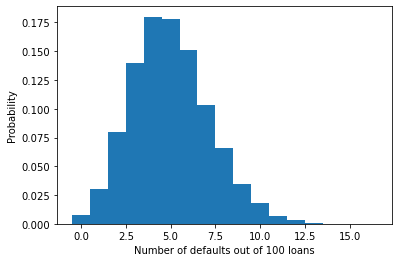

In [313]:
# Bernouli trials can also be performed with the random library!
n_defaults = np.random.binomial(100, 0.05, size=10000)
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, density=True, bins=bins)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

In [314]:
# Define a function ecdf:
def ecdf(array):
    x = np.sort(array)
    n = x.size
    y = np.arange(1, n+1) / n
    return (x, y)

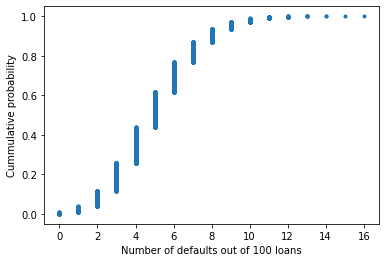

In [315]:
x, y = ecdf(n_defaults)
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Cummulative probability')
plt.show()

### Poisson Distribution

In [316]:
# Poisson process: 
# The timing of the next event is completely independent of the previous event happened
# The rate at which the events occur is constant

# Poisson distribution: limit of binomial distribution for low probability and 
# large number of trials (rare events)

# Mean = variance! so, std is sqrt(mean)

In [317]:
np.random.poisson(5, 10000)

array([5, 3, 7, ..., 6, 4, 6])

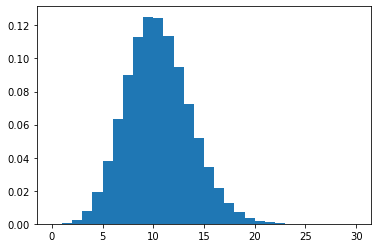

In [318]:
normal_sample = np.random.poisson(10, 1000000)
plt.hist(normal_sample, bins=30, density='True')
plt.show()

In [319]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0098 3.1819339968013165
n = 20 Binom: 9.9909 2.2070834125605674
n = 100 Binom: 10.0595 3.014292578699022
n = 1000 Binom: 9.9326 3.128842795667434


### Normal Distribution

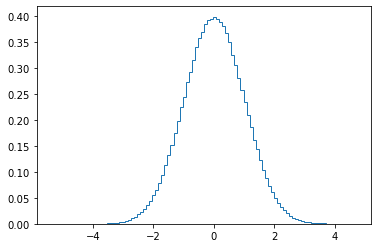

In [320]:
# Normal distribution:
normal_sample = np.random.normal(0, 1, 1000000)
plt.hist(normal_sample, bins=100, density=True, histtype='step')
plt.show()

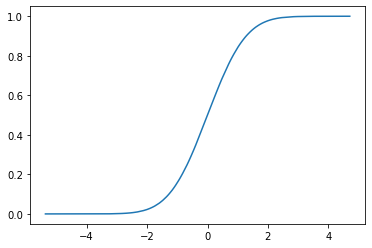

In [321]:
x, y = ecdf(normal_sample)
plt.plot(x, y)
plt.show()

In [322]:
import pandas as pd
df = pd.read_csv("../datasets/speed_of_light.csv")

In [323]:
sol = df["velocity of light in air (km/s)"]
mu, sigma = np.mean(sol), np.std(sol)
normal_sample = np.random.normal(mu, sigma, len(sol))

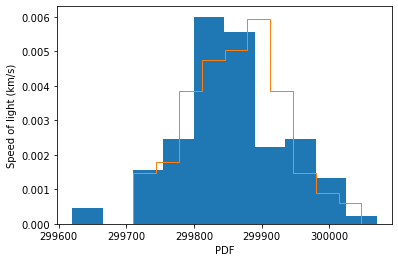

In [324]:
import seaborn as sns
plt.hist(sol, density=True, bins=10)
plt.hist(normal_sample, density=True, bins=10, histtype='step')
plt.xlabel("PDF")
plt.ylabel("Speed of light (km/s)")
plt.show()

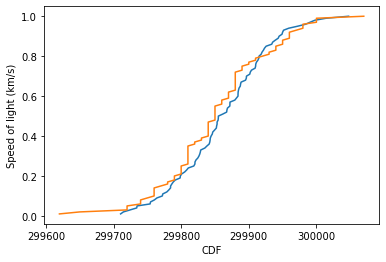

In [325]:
x, y = ecdf(sol)
x_theor, y_theor = ecdf(normal_sample)
plt.plot(x_theor, y_theor)
plt.plot(x, y)
plt.xlabel("CDF")
plt.ylabel("Speed of light (km/s)")
plt.show()

In [326]:
# We can see that the speed of light measurements follow a normal distribution!

### Exponential Distribution

In [327]:
# Exponential distribution
# Describes the waiting time between rare events or poisson processes (inverse of poisson)

# Poisson -> Cars passing every hour
# Exponential -> Number of waiting time between cars

# Events must happen at a constant rate, and be independent with each other: memoryless

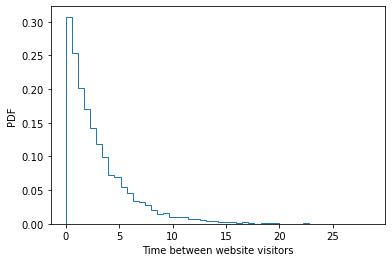

In [328]:
exponential_sample = np.random.exponential(3, 10000)
plt.hist(exponential_sample, bins=50, density=True, histtype="step")
plt.xlabel('Time between website visitors')
plt.ylabel('PDF')
plt.show()
# p at t0 is largest because p at t1 includes not arriving at t0 plus arriving at t01!


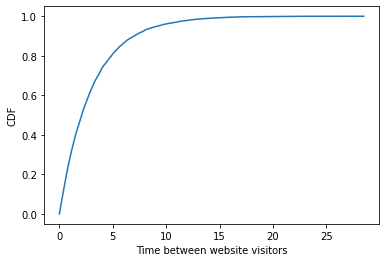

In [329]:
x, y = ecdf(exponential_sample)
plt.plot(x, y)
plt.xlabel('Time between website visitors')
plt.ylabel('CDF')
plt.show()

In [330]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau1, size)

    return t1 + t2

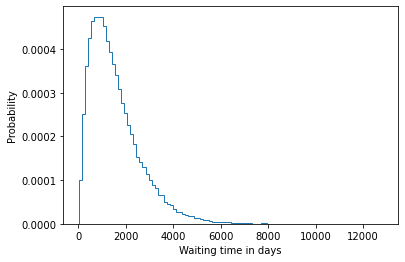

In [331]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, 100000)

# Plot the histogram
plt.hist(waiting_times, bins=100, density=True, histtype="step")
plt.xlabel("Waiting time in days")
plt.ylabel("Probability")
plt.show()

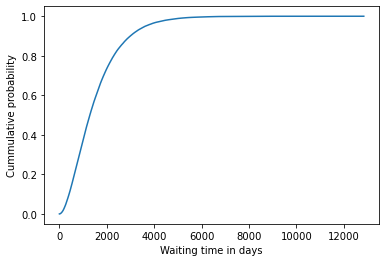

In [332]:
x, y = ecdf(waiting_times)
plt.plot(x, y)
plt.xlabel("Waiting time in days")
plt.ylabel("Cummulative probability")
plt.show()

### Central Limit Theorem

In [333]:
# Central limit theorem: the means of any distribution form a normal distribution

# In order to be true, the rule of thumb says that we need a sample size of at least 30


## Parameter Optimization

In [334]:
# Linear regression by least squares

election = pd.read_csv("../datasets/election_data.csv")
election.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


[[1.         0.86969365]
 [0.86969365 1.        ]]
[5.05878522e-01 7.85968421e+03]


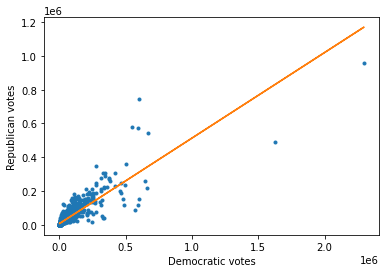

In [335]:
print(np.corrcoef(election.dem_votes, election.rep_votes))

linregress = np.polyfit(election.dem_votes, election.rep_votes, 1)
trend = np.poly1d(linregress)
print(linregress)

plt.plot("dem_votes", "rep_votes", data=election, marker=".", linestyle="none")
plt.plot(election.dem_votes, trend(election.dem_votes))
plt.xlabel("Democratic votes")
plt.ylabel("Republican votes")
plt.show()

In [336]:
# A linear model is a parametric estimate: makes assumptions about the probability distribution 
# underlying the data

## Generating Bootsrap Replicates

In [337]:
# Bootsrapping: using resampled data to perform statistical inference

# Boostrap sample: resampled array of data
# Boostrap replicate: value of the summary statistic computed from a resampled array

In [338]:
print(np.mean(sol))
print(np.median(sol))
print(np.std(sol))
print("------")
bs_sample = np.random.choice(sol, size=100)
print(np.mean(bs_sample))
print(np.median(bs_sample))
print(np.std(bs_sample))

299852.4
299850.0
78.61450247886843
------
299841.3
299840.0
75.33465338076495


In [339]:
sol

0     299850
1     299740
2     299900
3     300070
4     299930
       ...  
95    299940
96    299950
97    299800
98    299810
99    299870
Name: velocity of light in air (km/s), Length: 100, dtype: int64

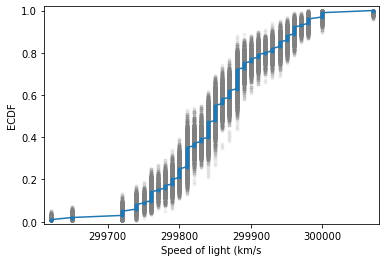

In [340]:
for _ in range(1000):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(sol, size=len(sol))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(sol)
plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
plt.xlabel('Speed of light (km/s')
plt.ylabel('ECDF')

# Show the plot
plt.show()

Confidence Interval:  [299837.1975 299867.6   ]


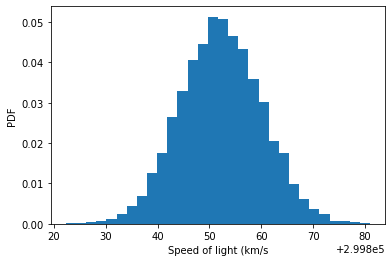

In [341]:
# Bootstrap Confidence Intervals 
bs_replicates = np.empty(10000)
for i in range(10000):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(sol, size=len(sol))
    bs_replicates[i] = np.mean(bs_sample)

confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
print("Confidence Interval: ", confidence_interval)

plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel('Speed of light (km/s')
plt.ylabel('PDF')
plt.show()

### Pairs Bootstrap for Linear Regression

In [342]:
# Resample data in pairs
# Compute slope and intercept from resampled data, each is a bootsrap replicate
# Compute CI from percentiles of bootsrap replicates

In [343]:
inds = np.arange(len(election.dem_votes))
bs_inds = np.random.choice(inds, len(inds))

bs_dem_votes = election.dem_votes[bs_inds]
bs_rep_votes = election.rep_votes[bs_inds]

[4.72184815e-01 8.31745771e+03]


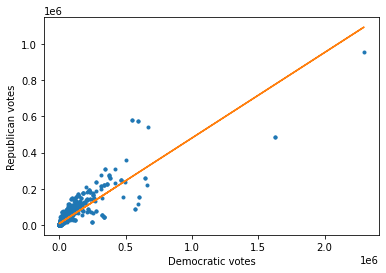

In [344]:
linregress = np.polyfit(bs_dem_votes, bs_rep_votes, 1)
trend = np.poly1d(linregress)
print(linregress)

plt.plot(bs_dem_votes, bs_rep_votes, marker=".", linestyle="none")
plt.plot(bs_dem_votes, trend(bs_dem_votes))
plt.xlabel("Democratic votes")
plt.ylabel("Republican votes")
plt.show()

In [345]:
size = 1000
inds = np.arange(len(election.dem_votes))
bs_slope_reps = np.empty(size)
bs_intercept_reps = np.empty(size)

for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_dem_votes, bs_rep_votes = election.dem_votes[bs_inds], election.rep_votes[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_dem_votes, bs_rep_votes, 1)


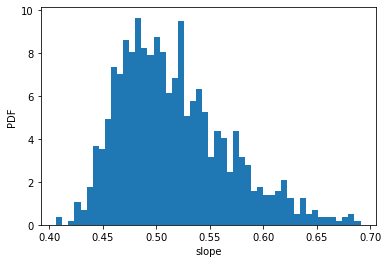

In [346]:
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

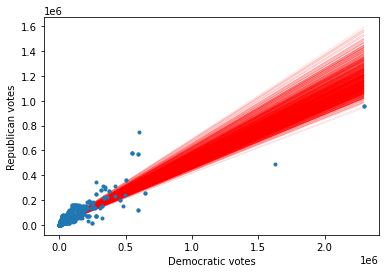

In [347]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, election.dem_votes.max()])

# Plot the bootstrap lines
for i in range(len(bs_slope_reps)):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

plt.plot(bs_dem_votes, bs_rep_votes, marker=".", linestyle="none")
plt.xlabel("Democratic votes")
plt.ylabel("Republican votes")
plt.show()

## Hypothesis Testing

In [348]:
# How reasonable the observed data is assuming a certain hypothesis is true?
# Comparing our data with the null hypothesis: assume that 2 quantities are identically distributed, and simulate
# what the distribution looks like
# The null hypothesis is rejected if its probability falls down to a determinate level, usually 5%. 

In [349]:
# Pipeline for null hypothesis:
# 1. Clearly state the null hypothesis
# 2. Define test statistic
# 3. Generate sets of simulated data assuming the null hypothesis is true
# 4. Compute test statistic for each simulated data set
# 5. P-value is the fraction of data sets for which the test statistic is at least as extreme as for the real one 

In [350]:
# Hypothesis test 1: Permutation
# Merge 2 quantities and randomly reorder of entries of the combined array.
# To get a p-value, we randomly sample (without replacement) possible permutations of our variable of interest. 
# The p-value is the proportion of samples that have a test statistic larger than that of our observed data

In [351]:
ohio = election[election["state"] == "OH"]
pennsylvania = election[election["state"] == "PA"]

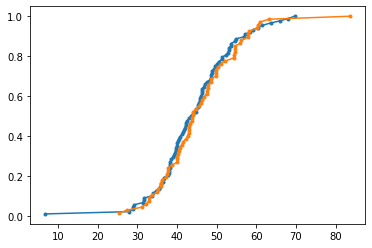

In [352]:
x_OH, y_OH = ecdf(ohio.dem_share)
x_PA, y_PA = ecdf(pennsylvania.dem_share)
plt.plot(x_OH, y_OH, marker='.')
plt.plot(x_PA, y_PA, marker='.')
plt.show()

In [353]:
ohio.dem_share.describe() - pennsylvania.dem_share.describe()

count    21.000000
mean     -1.158236
std       0.092671
min     -18.540000
25%      -1.070000
50%      -0.355000
75%      -0.950000
max     -13.920000
Name: dem_share, dtype: float64

In [354]:
# Hypothesis: do PA and OH have the same distribution? We can use permutation to evaluate the null hypothesis!

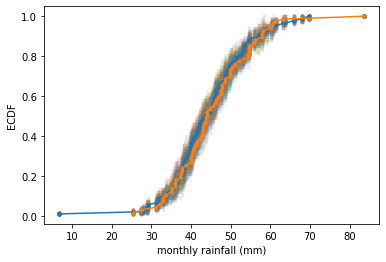

In [355]:
both_dem_share = pd.concat([ohio.dem_share, pennsylvania.dem_share])
means = np.empty(100)

for i in range(0, 100):
    perm_dem_share = np.random.permutation(both_dem_share)
    OH_perm_sample = perm_dem_share[:len(ohio.dem_share)]
    PA_perm_sample = perm_dem_share[len(ohio.dem_share):]
    means[i] = np.mean(OH_perm_sample) - np.mean(PA_perm_sample)
    x_OH_perm, y_OH_perm = ecdf(OH_perm_sample)
    x_PA_perm, y_PA_perm = ecdf(PA_perm_sample)
    plt.plot(x_OH_perm, y_OH_perm, marker='.', linestyle="none", alpha=0.1)
    plt.plot(x_PA_perm, y_PA_perm, marker='.', linestyle="none", alpha=0.1)

x_OH, y_OH = ecdf(ohio.dem_share)
x_PA, y_PA = ecdf(pennsylvania.dem_share)
plt.plot(x_OH, y_OH, marker='.')
plt.plot(x_PA, y_PA, marker='.')
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()
plt.show()

In [356]:
# The perumations overlap the data. We cannot reject the null hypothesis. We can't 
# reject that they are identically distributed. 

In [357]:
empirical_diff_mean = np.mean(ohio.dem_share) - np.mean(pennsylvania.dem_share)
p = np.sum(means >= empirical_diff_mean) / len(means)

# Print the result
print('p-value =', p)

p-value = 0.76


In [358]:
# The p-value tells us that there is about a 76% chance that we would 
# get the difference of means observed in the experiment if the distributions were exactly the same.

# Case Study:

In [359]:
fb75 = pd.read_csv("../datasets/finch_beaks/finch_beaks_1975.csv")
fb12 = pd.read_csv("../datasets/finch_beaks/finch_beaks_2012.csv")

In [360]:
fb75.describe()

,band,"Beak length, mm","Beak depth, mm"
count,403.000000,403.000000,403.000000
mean,1873.183623,11.332804,9.125955
std,4584.953069,1.619126,0.708737
min,2.000000,8.700000,7.500000
25%,458.500000,10.200000,8.600000
50%,671.000000,10.900000,9.100000
75%,899.500000,11.740000,9.700000
max,20298.000000,15.940000,10.980000


In [361]:
fb12.describe()

,band,blength,bdepth
count,248.000000,248.000000,248.000000
mean,20119.641129,12.004315,8.902823
std,844.713528,1.642203,0.757521
min,19022.000000,9.000000,7.200000
25%,19436.750000,10.475000,8.300000
50%,19817.500000,12.300000,8.900000
75%,21135.250000,13.425000,9.400000
max,22000.000000,15.200000,11.100000


In [362]:
fb75.rename(columns = {'Beak length, mm':'blength', 'Beak depth, mm':'bdepth'}, inplace = True)


In [363]:
# Question: have the beaks for Fortis species gotten deeper over time?

In [364]:
fb75["year"] = 1975
fb12["year"] = 2012
fb = pd.concat([fb75, fb12])
fb

,band,species,blength,bdepth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975
...,...,...,...,...,...
243,21295,scandens,14.2,9.3,2012
244,21297,scandens,13.0,9.8,2012
245,21340,scandens,14.6,8.9,2012
246,21342,scandens,13.1,9.8,2012


In [365]:
fb = fb[fb["species"]=="fortis"]
fb75 = fb75[fb75["species"]=="scandens"]
fb12 = fb12[fb12["species"]=="scandens"]


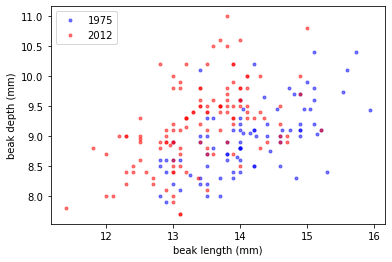

In [373]:
# Make scatter plot of 1975 data
plt.plot("blength", "bdepth", data=fb75, color="blue", marker='.',
             linestyle='None', alpha=0.5)

# Make scatter plot of 2012 data
plt.plot("blength", "bdepth", data=fb12, color="red", marker='.',
             linestyle='None', alpha=0.5)

# Label axes and make legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

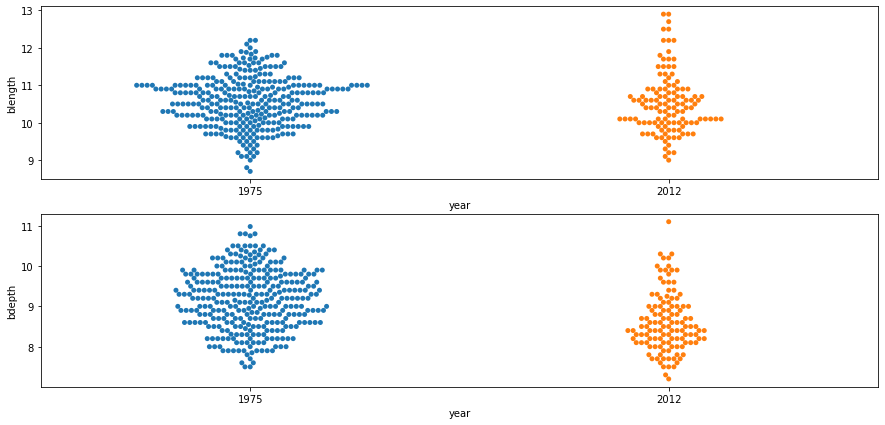

In [366]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7))
sns.swarmplot(ax=ax[0], x="year", y="blength", data=fb)
sns.swarmplot(ax=ax[1], x="year", y="bdepth", data=fb)
plt.show()

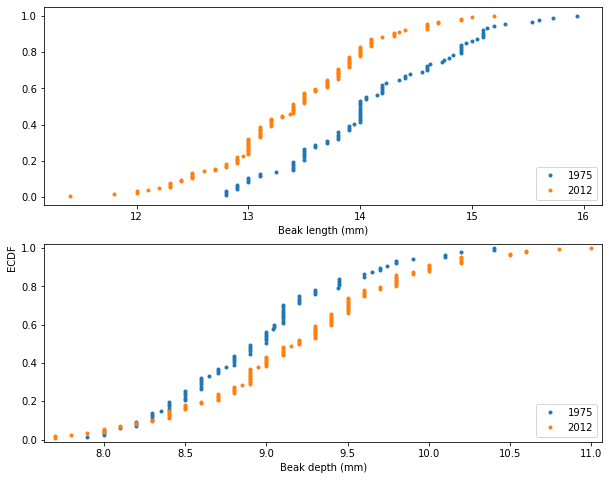

In [367]:
# Compute ECDFs
x_bl75, y_bl75 = ecdf(fb75.blength)
x_bl12, y_bl12 = ecdf(fb12.blength)

x_bd75, y_bd75 = ecdf(fb75.bdepth)
x_bd12, y_bd12 = ecdf(fb12.bdepth)

# Plot the ECDFs
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(x_bl75, y_bl75, marker='.', linestyle='none')
ax[0].plot(x_bl12, y_bl12, marker='.', linestyle='none')
ax[1].plot(x_bd75, y_bd75, marker='.', linestyle='none')
ax[1].plot(x_bd12, y_bd12, marker='.', linestyle='none')
# Set margins
plt.margins(0.02)

# Add axis labels and legend
plt.ylabel("ECDF", loc="top")
ax[0].set_xlabel("Beak length (mm)")
ax[1].set_xlabel("Beak depth (mm)")
ax[0].legend(('1975', '2012'), loc='lower right')
ax[1].legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [368]:
# Beak length confidence interval using bootstrapping

bl_mean_diff = np.mean(fb12.blength) - np.mean(fb75.blength)

bs_bl_mean_diffs = np.empty(10000)
for i in range(0, 10000):
    bs_bl12 = np.random.choice(fb12.blength, size=len(fb12.blength))
    bs_bl75 = np.random.choice(fb75.blength, size=len(fb75.blength))
    bs_bl_mean_diffs[i] = np.mean(bs_bl12) - np.mean(bs_bl75)

bl_ci = np.percentile(bs_bl_mean_diffs, [2.5, 97.5])
print('Beak length difference of means =', bl_mean_diff, 'mm')
print("Beak length 95% Confidence Interval: ", bl_ci, " mm")

Beak length difference of means = -0.6998959181826354 mm
Beak length 95% Confidence Interval:  [-0.90279028 -0.49565809]  mm


In [369]:
# Beak depth confidence interval using bootstrapping

bd_mean_diff = np.mean(fb12.bdepth) - np.mean(fb75.bdepth)

bs_bd_mean_diffs = np.empty(10000)
for i in range(0, 10000):
    bs_bd12 = np.random.choice(fb12.bdepth, size=len(fb12.bdepth))
    bs_bd75 = np.random.choice(fb75.bdepth, size=len(fb75.bdepth))
    bs_bd_mean_diffs[i] = np.mean(bs_bd12) - np.mean(bs_bd75)

bd_ci = np.percentile(bs_bd_mean_diffs, [2.5, 97.5])
print('Beak depth difference of means =', bd_mean_diff, 'mm')
print("Beak depth 95% Confidence Interval: ", bd_ci, " mm")

Beak depth difference of means = 0.2262204724409429 mm
Beak depth 95% Confidence Interval:  [0.06179659 0.39076869]  mm


In [370]:
# What is the probability that we would get the observed difference in mean beak depth 
# if the means were the same?

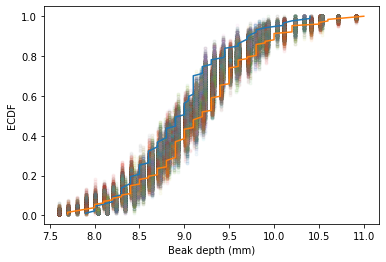

p = 0.008


In [372]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((fb75.bdepth, fb12.bdepth)))

# Shift the samples
bd_1975_shifted = fb75.bdepth - np.mean(fb75.bdepth) + combined_mean
bd_2012_shifted = fb12.bdepth - np.mean(fb12.bdepth) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_bd_mean_diffs = np.empty(1000)
for i in range(0, 1000):
    bs_bd12 = np.random.choice(bd_1975_shifted, size=len(fb75.bdepth))
    bs_bd75 = np.random.choice(bd_2012_shifted, size=len(fb12.bdepth))
    bs_bd_mean_diffs[i] = np.mean(bs_bd12) - np.mean(bs_bd75)

    x_bs_bd12, y_bs_bd12 = ecdf(bs_bd12)
    x_bs_bd75, y_bs_bd75 = ecdf(bs_bd75)
    plt.plot(x_bs_bd12, y_bs_bd12, marker='.', linestyle="none", alpha=0.05)
    plt.plot(x_bs_bd75, y_bs_bd75, marker='.', linestyle="none", alpha=0.05)

plt.plot(x_bd75, y_bd75)
plt.plot(x_bd12, y_bd12)
plt.xlabel('Beak depth (mm)')
plt.ylabel('ECDF')
plt.show()
plt.show()

# Compute the p-value
p = np.sum(bs_bd_mean_diffs >= bd_mean_diff) / len(bs_bd_mean_diffs)

# Print p-value
print('p =', p)
